In [2]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt

from models import ResNetGenerator
import utils

# Prepare
## Set Arguments

In [3]:
class Arguments():
    def __init__(self):
        self.imfile = './datasets/horse2zebra/testA/n02381460_200.jpg'
        self.input_nc = 3
        self.output_nc = 3
        self.ngf = 64
        self.ndf = 64

args = Arguments()
os.makedirs('./results/predict', exist_ok=True)

## Define Model

In [4]:
# Define Model
net_G = ResNetGenerator(
    input_nc=args.input_nc,
    output_nc=args.output_nc,
    ngf=args.ngf,
    n_blocks=9
)

# Load Weights
state_dict = torch.load('./latest_net_G.pth', map_location='cpu')
net_G.load_state_dict(state_dict)

<All keys matched successfully>

## Predict

In [5]:
# Create Tensor from Image file
im_file = args.imfile
tensor_img = utils.create_data(im_file)

In [6]:
outputs = net_G.forward(tensor_img)

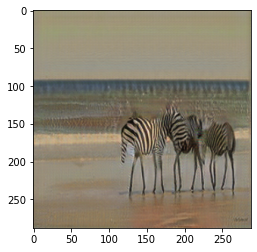

In [7]:
im = utils.tensor2im(outputs)

image_pil = Image.fromarray(im)
plt.imshow(im)